# ProbStats Lab6 -- HT week 8

The problems in Laboratory 6 (week 8) for Probability and Statistics focus on how we can statistically characterize relationships between variables using correlation and regression analysis. Use this empty notebook to complete portions of the lab that require the Math, NumPy, SciPy, Matplotlib, and other Python libraries. I've loaded a few libraries to get you started.  

In [2]:
# Import Math, NumPy, SciPy, and Matplotlib
import math as m
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 
import statistics as st
import csv

# Q1

Correlation tells us many things, but it won’t tell us everything! In this exercise, we’ll explore a series of
datasets that will convince us that this is so. Relevant data for this analysis can be found on Canvas in a
text file entitled ‘L8_Q1.txt’. The spreadsheet contains four different datasets, labelled as A-D. Original
data derive from Anscombe (1973), American Statistician 27:17-21.

# Q1a

Calculating important summary statistics is a good way to begin wading into new datasets. Calculate
$\bar{x}$, $\bar{y}$, sx, and sy for each dataset. (Double check that any Python functions you use are for sample
standard deviations!) How do these compare?

# Q1b

Given that each of these datasets is bivariate, you might wish to determine the ways in which the two
variables covary. Calculate Pearson’s r for each dataset without resorting to any built-in NumPy
and/or SciPy functions. How do these compare across datasets?

# Q1c

Using a built-in NumPy and/or SciPy function, calculate the p value for Pearson’s r for one of the
datasets. What is it? Is your test significant at the α = 0.05 level? As it turns out, this is the p value for
all datasets A-D. Explain why.

# Q1d

The following exercises might have given you a distinct impression about how the four datasets
compare. Read the documentation for the Matplotlib function subplots(). Create a figure with four
plots, one each for datasets A-D. Looking at these plots, what important lesson have you learned? 

In [1]:
#Q1a
!head -n 13 ../Week16/L8_Q1.txt

%Dataset A		Dataset B		Dataset C		Dataset D	
%Y	X	Y	X	Y	X	Y	X
8.04	10	9.14	10	7.46	10	6.58	8
6.95	8	8.14	8	6.77	8	5.76	8
7.58	13	8.74	13	12.74	13	7.71	8
8.81	9	8.77	9	7.11	9	8.84	8
8.33	11	9.26	11	7.81	11	8.47	8
9.96	14	8.1	14	8.84	14	7.04	8
7.24	6	6.13	6	6.08	6	5.25	8
4.26	4	3.1	4	5.39	4	12.5	19
10.84	12	9.13	12	8.15	12	5.56	8
4.82	7	7.26	7	6.42	7	7.91	8
5.68	5	4.74	5	5.73	5	6.89	8

In [3]:
#Q1a
dataset_A= np.array([[8.04, 10], [6.95, 8], [7.58, 13], [8.81, 9], [8.33, 11], [9.96, 14], [7.24, 6], [4.26, 4], [10.84, 12], [4.82, 7], [5.68, 5]])
dataset_B = np.array([[9.14, 10], [8.14, 8], [8.74, 13], [8.77, 9], [9.26, 11], [8.10, 14], [6.13, 6], [3.10, 4], [9.13, 12], [7.26, 7], [4.74, 5]])
dataset_C = np.array([[7.46, 8], [6.77, 8], [12.74, 13], [7.11, 9], [7.81, 11], [8.84, 14], [6.08, 6], [5.39, 4], [8.15, 12], [6.42, 7], [5.73, 5]])
dataset_D = np.array([[6.58, 8], [5.76, 8], [7.71, 8], [8.84, 8], [8.47, 8], [7.04, 8], [5.25, 8], [12.5, 19], [5.56, 8], [7.91, 8], [6.89, 8]])

In [4]:
#Q1a

def mean(data):
    return sum(data) / len(data)


def std_dev(data):
    m = mean(data)
    return (sum((x - m) ** 2 for x in data) / (len(data) - 1)) ** 0.5


summary_statistics = []
for dataset in [dataset_A, dataset_B, dataset_C, dataset_D]:
    x = dataset[:, 0]
    y = dataset[:, 1]
    x_mean = mean(x)
    y_mean = mean(y)
    sx = std_dev(x)
    sy = std_dev(y)
    summary_statistics.append((x_mean, y_mean, sx, sy))


for i, stats in enumerate(summary_statistics):
    print(f"Dataset {chr(65 + i)}:")
    print("x̄:", stats[0])
    print("ȳ:", stats[1])
    print("sx:", stats[2])
    print("sy:", stats[3])
    print()


Dataset A:
x̄: 7.500909090909093
ȳ: 9.0
sx: 2.031568135925815
sy: 3.3166247903554

Dataset B:
x̄: 7.500909090909091
ȳ: 9.0
sx: 2.0316567355016177
sy: 3.3166247903554

Dataset C:
x̄: 7.500000000000001
ȳ: 8.818181818181818
sx: 2.030423601123667
sy: 3.311138227805714

Dataset D:
x̄: 7.50090909090909
ȳ: 9.0
sx: 2.0305785113876023
sy: 3.3166247903554



In [6]:
#Q1b

def pearson_r(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x_i * y_i for x_i, y_i in zip(x, y))
    sum_x_sq = sum(x_i ** 2 for x_i in x)
    sum_y_sq = sum(y_i ** 2 for y_i in y)
    
    numerator = n * sum_xy - sum_x * sum_y
    denominator = ((n * sum_x_sq - sum_x ** 2) * (n * sum_y_sq - sum_y ** 2)) ** 0.5
    
    if denominator == 0:
        return 0  
    else:
        return numerator / denominator


x_A = dataset_A[:, 0]
y_A = dataset_A[:, 1]
pearson_r_A = pearson_r(x_A, y_A)
print("Pearson's r for Dataset A:", pearson_r_A)


x_B = dataset_B[:, 0]
y_B = dataset_B[:, 1]
pearson_r_B = pearson_r(x_B, y_B)
print("Pearson's r for Dataset B:", pearson_r_B)


x_C = dataset_C[:, 0]
y_C = dataset_C[:, 1]
pearson_r_C = pearson_r(x_C, y_C)
print("Pearson's r for Dataset C:", pearson_r_C)


x_D = dataset_D[:, 0]
y_D = dataset_D[:, 1]
pearson_r_D = pearson_r(x_D, y_D)
print("Pearson's r for Dataset D:", pearson_r_D)


Pearson's r for Dataset A: 0.816420516344843
Pearson's r for Dataset B: 0.8162365060002422
Pearson's r for Dataset C: 0.8188292708488303
Pearson's r for Dataset D: 0.8165214368885068


In [10]:
#Q1c

x_A = dataset_A[:, 0]
y_A = dataset_A[:, 1]


r_A, p_value_A = sc.stats.pearsonr(x_A, y_A)

print("Pearson's r for Dataset A:", r_A)
print("P-value for Dataset A:", p_value_A)
print("Is the test significant at α = 0.05 level?", "Yes" if p_value_A < 0.05 else "No")


Pearson's r for Dataset A: 0.81642051634484
P-value for Dataset A: 0.002169628873078783
Is the test significant at α = 0.05 level? Yes


It appears that the datasets all produce very similar statistical values, and same p value (Anscombe's Quartet designed as such)

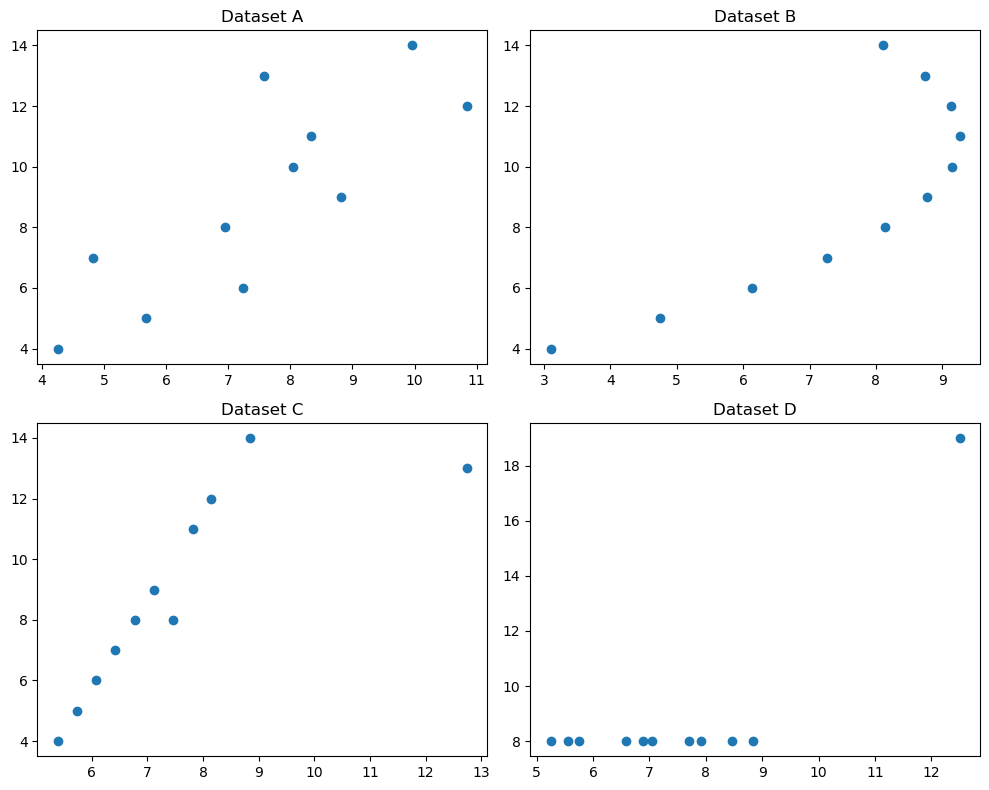

In [12]:
#Q1d
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.scatter(dataset_A[:, 0], dataset_A[:, 1])
plt.title('Dataset A')


plt.subplot(2, 2, 2)
plt.scatter(dataset_B[:, 0], dataset_B[:, 1])
plt.title('Dataset B')


plt.subplot(2, 2, 3)
plt.scatter(dataset_C[:, 0], dataset_C[:, 1])
plt.title('Dataset C')


plt.subplot(2, 2, 4)
plt.scatter(dataset_D[:, 0], dataset_D[:, 1])
plt.title('Dataset D')

plt.tight_layout()
plt.show()

We should not assume data looks the same just because they produce the same statistics

# Q2

When considering the relationships between two variables, we must be watchful for spurious correlations.
Such misleading associations can arise from many factors, and are particularly common for certain classes
of data frequently examined by earth scientists. Many compositional analyses (of the sort used in the
analysis of igneous and metamorphic rocks) can fall victim to spurious correlation when variables are
measured as ratios of other variables. For this problem, we will examine compositional data (expressed as
percent composition) for granite samples taken from the Schellerhau pluton in the Erzgebirge Mountains
of Germany. These are given in a CSV file named ‘L8_Q2.csv’ that has been uploaded to Canvas. Data
are from the suggested course text DA.

## Q2a

Calculate Pearson’s r for the correlation between the concentrations of Fe2O3 and MnO. Do so
without resorting to any built in NumPy or SciPy functions. Generate a bivariate scatter plot showing
concentration of MnO on the x-axis and concentration of Fe2O3 on the y-axis.

## Q2b

Using the appropriate NumPy and/or SciPy function, determine the significance of your test.

## Q2c 
 
Now express the concentrations of Fe2O3 and MnO relative to TiO2 (i.e., divide the concentration of
Fe2O3 and MnO for each sample by the concentration of TiO2 in that sample). Repeat the steps from
(a)-(b) with these rescaled data.

## Q2d

Compare your results from (a)-(b) and (c). How do they differ?

## Q2e

Repeat this exercise with a simple simulation exercise. Generate three, one-dimensional arrays with
25 normally distributed random variables each, and name them concentrationA, concentrationB,
and concentrationC. You may select any values for the two parameters of the normal distribution for
these simulated datasets (they may be the same for all three, or may differ).

## Q2f

What is the correlation between concentrationA and concentrationB? Is this significant? What
percentage of students in the class will find that this correlation is significant at the α = 0.05 level?
Complete your calculations using built-in NumPy and/or SciPy functions.

## Q2g

Now normalize both concentrationA and concentrationB by concentrationC (such that each is a
relative concentration). Find the correlation coefficient and p value for your newly rescaled versions
of concentrationA and concentrationB. Complete your calculations using built-in NumPy and/or
SciPy functions. What has changed relative to your response for (f)? 

In [14]:
#Q2a
!head -n 55 ../Week16/L8_Q2.csv

﻿%Class,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,LOI
3,72.99,0.054,14.26,0.92,0.03,0.1,0.6,4.53,4.76,0.028,1.73
3,74.42,0.03,13.96,0.57,0.017,0.048,0.68,3.41,4.8,0.022,2.05
3,72.43,0.052,14.88,0.98,0.06,0.09,0.57,4.52,4.48,0.041,2.23
3,72.24,0.05,14.82,1.15,0.082,0.11,0.74,4.23,4.54,0.038,2.15
3,72.21,0.053,14.99,1.07,0.047,0.1,0.64,5.06,4.1,0.034,2.2
3,74.85,0.057,13.04,1.11,0.023,0.044,0.56,3.57,5.39,0.015,1.26
3,71.94,0.07,14.64,1.23,0.032,0.09,0.91,4.13,4.65,0.033,2.93
3,72.62,0.056,14.32,1.25,0.027,0.1,0.93,3.79,4.41,0.037,2.85
3,73.71,0.064,13.75,0.93,0.018,0.061,0.94,3.82,4.73,0.032,2.51
3,71.69,0.056,15.12,1.28,0.036,0.14,0.94,3.78,4.33,0.037,2.39
3,75.45,0.108,12.35,0.89,0.013,0.13,0.78,3.22,5.3,0.018,1.68
3,75.69,0.039,12.58,1.01,0.029,0.026,0.49,3.73,4.86,0.008,1.37
3,75.71,0.046,12.62,1.04,0.033,0.037,0.49,3.86,4.57,0.009,1.46
3,74.64,0.081,12.92,1.26,0.03,0.1,0.67,3.8,5.06,0.023,1.59
3,75.62,0.032,12.84,0.98,0.034,0.016,0.44,4.14,4.41,0.012,1.73
3,75.78,0.067,12.72,

In [23]:
#Q2a
Fe2O3 = []
MnO = []

with open('L8_Q2.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  
    for row in reader:
        Fe2O3.append(float(row[4]))
        MnO.append(float(row[5]))
print(Fe2O3)
print(MnO)

[0.92, 0.57, 0.98, 1.15, 1.07, 1.11, 1.23, 1.25, 0.93, 1.28, 0.89, 1.01, 1.04, 1.26, 0.98, 1.36, 0.97, 1.2, 1.1, 1.03, 0.89, 1.32, 1.29, 1.37, 1.47, 1.53, 1.37, 1.17, 1.21, 1.28, 1.57, 0.93, 0.47, 0.95, 0.92, 0.88, 0.93, 0.82, 0.58, 0.54, 0.87, 0.87, 0.51, 0.97, 0.92, 1.39, 0.99, 0.37, 0.57, 0.76, 0.56, 0.52, 0.47, 1.33]
[0.03, 0.017, 0.06, 0.082, 0.047, 0.023, 0.032, 0.027, 0.018, 0.036, 0.013, 0.029, 0.033, 0.03, 0.034, 0.033, 0.034, 0.027, 0.024, 0.023, 0.02, 0.025, 0.025, 0.027, 0.038, 0.03, 0.02, 0.037, 0.053, 0.06, 0.076, 0.025, 0.025, 0.047, 0.047, 0.043, 0.043, 0.05, 0.058, 0.046, 0.051, 0.056, 0.026, 0.035, 0.045, 0.082, 0.066, 0.031, 0.065, 0.14, 0.099, 0.098, 0.05, 0.034]


$r =\frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$

In [24]:
#Q2a
mean_Fe2O3 = sum(Fe2O3) / len(Fe2O3)
mean_MnO = sum(MnO) / len(MnO)


covariance = sum((Fe2O3[i] - mean_Fe2O3) * (MnO[i] - mean_MnO) for i in range(len(Fe2O3))) / (len(Fe2O3) - 1)


std_Fe2O3 = m.sqrt(sum((x - mean_Fe2O3) ** 2 for x in Fe2O3) / (len(Fe2O3) - 1))
std_MnO = m.sqrt(sum((x - mean_MnO) ** 2 for x in MnO) / (len(MnO) - 1))


r = covariance / (std_Fe2O3 * std_MnO)

print("Pearson's r:", r)

Pearson's r: -0.18078541121646605


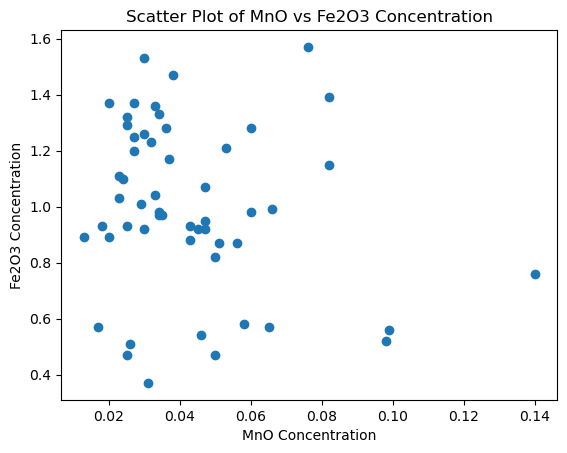

In [25]:
#Q2a
plt.scatter(MnO, Fe2O3)
plt.xlabel('MnO Concentration')

plt.ylabel('Fe2O3 Concentration')
plt.title('Scatter Plot of MnO vs Fe2O3 Concentration')
plt.show()

In [26]:
#Q2b
r, p_value = sc.stats.pearsonr(Fe2O3, MnO)

print("Pearson's r:", r)
print("p-value:", p_value)
print("Is the test significant at α = 0.05 level?", "Yes" if p_value_A < 0.05 else "No")

Pearson's r: -0.18078541121646602
p-value: 0.19079857255175045
Is the test significant at α = 0.05 level? Yes


Pearson's r for Fe2O3:TIO2: 0.779236736541497
p-value for Fe2O3:TIO2: 3.9200743349432065e-12


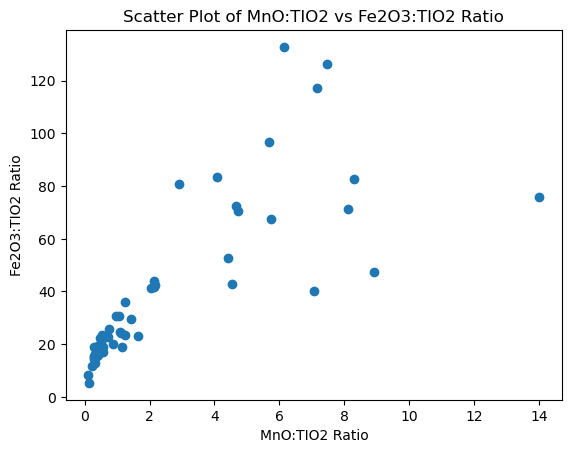

In [28]:
#Q2c

Fe2O3_to_TiO2 = []
MnO_to_TiO2 = []

with open('L8_Q2.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        TiO2 = float(row[2])  
        Fe2O3_to_TiO2.append(float(row[4]) / TiO2)
        MnO_to_TiO2.append(float(row[5]) / TiO2)


r_Fe2O3, p_value_Fe2O3 = sc.stats.pearsonr(Fe2O3_to_TiO2, MnO_to_TiO2)

print("Pearson's r for Fe2O3:TIO2:", r_Fe2O3)
print("p-value for Fe2O3:TIO2:", p_value_Fe2O3)

plt.scatter(MnO_to_TiO2, Fe2O3_to_TiO2)
plt.xlabel('MnO:TIO2 Ratio')
plt.ylabel('Fe2O3:TIO2 Ratio')
plt.title('Scatter Plot of MnO:TIO2 vs Fe2O3:TIO2 Ratio')
plt.show()

### Q2d

The results for data normalised to TiO2 shows much stronger correlation that just between Fe2O3 and MnO

In [29]:
#Q2e


np.random.seed(0)

concentrationA = np.random.normal(loc=10, scale=2, size=25)
concentrationB = np.random.normal(loc=12, scale=3, size=25)
concentrationC = np.random.normal(loc=8, scale=1, size=25)


print("Concentration A:", concentrationA)
print("Concentration B:", concentrationB)
print("Concentration C:", concentrationC)

Concentration A: [13.52810469 10.80031442 11.95747597 14.4817864  13.73511598  8.04544424
 11.90017684  9.69728558  9.7935623  10.821197   10.28808714 12.90854701
 11.52207545 10.24335003 10.88772647 10.66734865 12.98815815  9.58968347
 10.6261354   8.29180852  4.89402037 11.30723719 11.7288724   8.51566996
 14.53950925]
Concentration B: [ 7.63690298 12.13727555 11.43844845 16.59833764 16.40807631 12.46484228
 13.13448756  9.33664276  6.0576106  10.95626355 12.46904691 15.69087204
 15.60713955 10.83801955 11.09309175  8.8543411   7.73994619  6.88118943
 17.85232619 10.47104345 10.6857771   8.24161392 14.33247107  7.15830646
 11.36177916]
Concentration C: [7.10453344 8.3869025  7.48919486 6.81936782 7.97181777 8.42833187
 8.06651722 8.3024719  7.36567791 7.63725883 7.32753955 7.64044684
 7.18685372 6.2737174  8.17742614 7.59821906 6.36980165 8.46278226
 7.09270164 8.0519454  8.72909056 8.12898291 9.13940068 6.76517418
 8.40234164]


In [30]:
#Q2f
correlation_coefficient, p_value = sc.stats.pearsonr(concentrationA, concentrationB)

print("Pearson's correlation coefficient between concentrationA and concentrationB:", correlation_coefficient)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The correlation is significant at α = 0.05 level.")
else:
    print("The correlation is not significant at α = 0.05 level.")

Pearson's correlation coefficient between concentrationA and concentrationB: 0.3226187166990777
p-value: 0.11574102267130952
The correlation is not significant at α = 0.05 level.


In [38]:
#Q2g
concentrationA_normalised = concentrationA / concentrationC
concentrationB_normalised = concentrationB / concentrationC

correlation_coefficient_normalised, p_value_normalised = sc.stats.pearsonr(concentrationA_normalised, concentrationB_normalised)

print("Pearson's correlation coefficient between normalised concentrationA and normalized concentrationB:", correlation_coefficient_normalised)
print("p-value for the normalised concentrations:", p_value_normalised)
alpha = 0.05
if p_value_normalised < alpha:
    print("The correlation is significant at α = 0.05 level.")
else:
    print("The correlation is not significant at α = 0.05 level.")

Pearson's correlation coefficient between normalised concentrationA and normalized concentrationB: 0.6743113108132764
p-value for the normalised concentrations: 0.00021873808683235894
The correlation is significant at α = 0.05 level.


In [39]:
#Q2e-2g trial 2
np.random.seed(1)

concentrationA = np.random.normal(loc=10, scale=2, size=25)
concentrationB = np.random.normal(loc=10, scale=2, size=25)
concentrationC = np.random.normal(loc=10, scale=2, size=25)


print("Concentration A:", concentrationA)
print("Concentration B:", concentrationB)
print("Concentration C:", concentrationC)
correlation_coefficient, p_value = sc.stats.pearsonr(concentrationA, concentrationB)

print("Pearson's correlation coefficient between concentrationA and concentrationB:", correlation_coefficient)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The correlation is significant at α = 0.05 level.")
else:
    print("The correlation is not significant at α = 0.05 level.")

concentrationA_normalised = concentrationA / concentrationC
concentrationB_normalised = concentrationB / concentrationC

correlation_coefficient_normalised, p_value_normalised = sc.stats.pearsonr(concentrationA_normalised, concentrationB_normalised)

print("Pearson's correlation coefficient between normalised concentrationA and normalized concentrationB:", correlation_coefficient_normalised)
print("p-value for the normalised concentrations:", p_value_normalised)
alpha = 0.05
if p_value_normalised < alpha:
    print("The correlation is significant at α = 0.05 level.")
else:
    print("The correlation is not significant at α = 0.05 level.")

Concentration A: [13.24869073  8.77648717  8.9436565   7.85406276 11.73081526  5.39692261
 13.48962353  8.4775862  10.63807819  9.50125925 12.92421587  5.87971858
  9.35516559  9.23189129 12.26753888  7.80021747  9.65514358  8.24428316
 10.08442749 11.16563043  7.79876165 12.28944742 11.80318144 11.00498868
 11.8017119 ]
Concentration B: [ 8.63254428  9.75421955  8.12846113  9.46422384 11.06071093  8.6166785
  9.20649295  8.6256546   8.30958872  8.65750774  9.9746708   7.7653793
 10.4688314  13.31960435 11.48408832  9.6163289   8.22474207  8.50568341
 13.3849092  10.10161551  8.72600871 10.38183097 14.20051027 10.2403179
 11.23440622]
Concentration C: [10.60034064  9.29550031  7.7149636   9.30131456  9.58221153 11.17324638
 11.67796683 11.86220416 10.57117465 11.77028233  8.49120412 12.50573631
 11.02585964  9.40381433 10.97703629  9.84885657 12.26325877 13.03963363
 14.37115081  7.20700733  7.11177239  8.99106827 10.32007414 11.75233784
 10.63126989]
Pearson's correlation coefficient 

After normalisation, correlation becomes significant. This could be because the variables are related to each other proportionally, adding up to 100%

# Q3

One of the most striking empirical patterns in biology concerns the distribution of species as a function of
latitude: species diversity is much higher at low latitudes (think the tropics) than at high latitudes (think Oxford
and the poles). This latitudinal diversity gradient has been stable over geological time, with earliest evidence
for such a pattern dating to the Ordovician, some 450 million years ago.
Here we’ll use correlation techniques to test whether we can detect any evidence for this gradient in a small
dataset. Every year, the Audobon Society coordinates a winter activity called the Christmas Bird Count, during
which teams of birders document the number of bird species found within ‘count circles’ with a diameter of
24 km. Our data derive from sites along the north-south orientated Delmarva Peninsula on the eastern seaboard
of the United States, and have been placed on Canvas in a file named ‘L8_BIRDS.csv’.

## Q3a

Find the correlation coefficients for the relationship between latitude and species richness using both
techniques we learned in class. Find these without the aid of any NumPy and/or SciPy functions.
Convert values to ranks manually.

## Q3b

What is the statistical significance of your two tests? Determine this using the appropriate built-in
NumPy and/or SciPy function(s).

## Q3c

Discuss your result. Are you surprised, based on what you learned in the introduction to this problem? 

In [5]:
!head -n 18 ../Week16/L8_BIRDS.csv

﻿latitude,species
37.23,159
38.31,120
39.13,123
37.71,114
38.52,135
39.24,129
37.94,126
38.55,94
39.48,111
38.01,117
38.76,138
39.56,99
38.24,154
38.81,97
39.72,103
38.25,109
38.84,118

In [4]:
#Q3a
latitude = []
species_richness = []


with open('L8_BIRDS.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  
    for row in reader:
        latitude.append(float(row[0]))
        species_richness.append(float(row[1]))


latitude_ranks = [i + 1 for i in range(len(latitude))]
sorted_data = sorted(zip(latitude, species_richness), key=lambda x: x[1])  
species_richness_ranks = [sorted_data.index(x) + 1 for x in zip(latitude, species_richness)]

print('latitude_ranks', latitude_ranks)
print('sorted_data',sorted_data)
print('species_richness_ranks', species_richness_ranks)

latitude_ranks [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
sorted_data [(38.55, 94.0), (38.81, 97.0), (39.56, 99.0), (39.72, 103.0), (38.25, 109.0), (39.48, 111.0), (37.71, 114.0), (38.01, 117.0), (38.84, 118.0), (38.31, 120.0), (39.13, 123.0), (37.94, 126.0), (39.24, 129.0), (38.52, 135.0), (38.76, 138.0), (38.24, 154.0), (37.23, 159.0)]
species_richness_ranks [17, 10, 11, 7, 14, 13, 12, 1, 6, 8, 15, 3, 16, 2, 4, 5, 9]


In [5]:
#Q3a
mean_latitude = sum(latitude) / len(latitude)
mean_species_richness = sum(species_richness) / len(species_richness)

# Pearson correlation coefficient
covariance = sum((x - mean_latitude) * (y - mean_species_richness) for x, y in zip(latitude, species_richness)) / (len(latitude) - 1)

std_dev_latitude = (sum((x - mean_latitude) ** 2 for x in latitude) / (len(latitude) - 1)) ** 0.5
std_dev_species_richness = (sum((y - mean_species_richness) ** 2 for y in species_richness) / (len(species_richness) - 1)) ** 0.5



pearson_correlation = covariance / (std_dev_latitude * std_dev_species_richness)

# Spearman correlation coefficient
differences_squared = [(x - y) ** 2 for x, y in zip(latitude_ranks, species_richness_ranks)]
total_differences_squared = sum(differences_squared)
spearman_correlation = 1 - ((6 * total_differences_squared) / (len(latitude) * ((len(latitude) ** 2) - 1)))

print("Pearson correlation coefficient:", pearson_correlation)
print("Spearman correlation coefficient:", spearman_correlation)

Pearson correlation coefficient: -0.4925764334311512
Spearman correlation coefficient: -0.428921568627451


In [6]:
#Q3b
pearson_corr, pearson_p_value = sc.stats.pearsonr(latitude, species_richness)
print("Pearson correlation coefficient:", pearson_corr)
print("P-value for Pearson correlation:", pearson_p_value)

spearman_corr, spearman_p_value = sc.stats.spearmanr(latitude, species_richness)
print("Spearman correlation coefficient:", spearman_corr)
print("P-value for Spearman correlation:", spearman_p_value)


Pearson correlation coefficient: -0.4925764334311513
P-value for Pearson correlation: 0.04455976985865176
Spearman correlation coefficient: -0.4068627450980392
P-value for Spearman correlation: 0.10506394931044012


### I am getting different results for part a and b, I do not know what I have done wrong in part a specifically for the Spearman coefficient

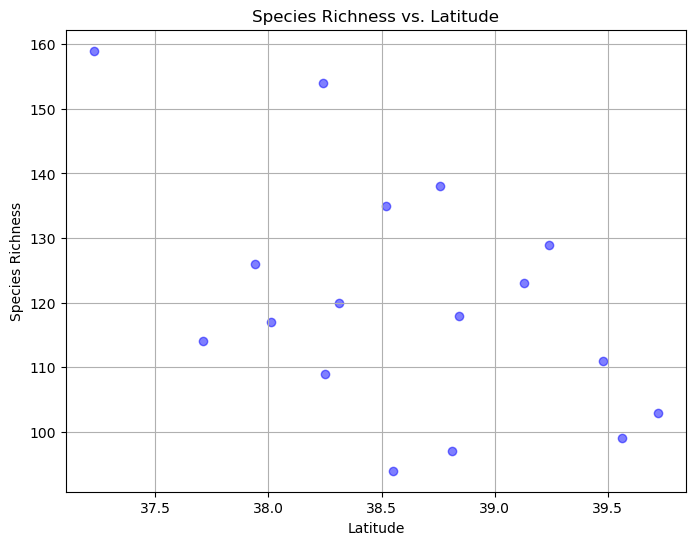

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(latitude, species_richness, color='blue', alpha=0.5)
plt.title('Species Richness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Species Richness')
plt.grid(True)
plt.show()

# Q4

Now we’ll explore the same data in Question 3 using linear regression.

## Q4a

In analyzing the relationship between latitude and species richness, which of these would you select
as the independent variable? Dependent variable? Justify your response.

## Q4b

Having identified the regressor and regressed variables in the previous question, calculate b for a least-squares regression line. Do so without using any built-in NumPy and/or SciPy function functions for
regression.

## Q4c

With the slope b in hand, calculate the y-intercept a.

## Q4d

Calculate the F statistic using the method we outlined in class. What are the degrees of freedom for
this test? Is this regression significant at the α = 0.05 level? What was the null hypothesis you just
tested? 

### Q4a

Latitude is independent, species richness is dependent, because latitude influences species richness but is not itself influenced by species richness

$\hat{\beta} = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}$

In [8]:
#Q4b
mean_latitude = sum(latitude) / len(latitude)
mean_species_richness = sum(species_richness) / len(species_richness)

numerator = sum((x - mean_latitude) * (y - mean_species_richness) for x, y in zip(latitude, species_richness))
denominator = sum((x - mean_latitude) ** 2 for x in latitude)

slope_b = numerator / denominator

print("Slope (b):", slope_b)


Slope (b): -13.324495381457387


In [9]:
#Q4c
intercept_a = mean_species_richness - slope_b * mean_latitude

print("Y-intercept (a):", intercept_a)

Y-intercept (a): 634.7568422853226


In [10]:
#Q4d- based on this website: http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

SST = sum((y - mean_species_richness) ** 2 for y in species_richness)

SSR = sum((slope_b * x + intercept_a - mean_species_richness) ** 2 for x, y in zip(latitude, species_richness))

SSE = SST - SSR

df_reg = 1  
df_res = len(latitude) - 2

MSR = SSR / df_reg
MSE = SSE / df_res


F_statistic = MSR / MSE

critical_F_value = sc.stats.f.ppf(0.95, df_reg, df_res)

regression_significant = F_statistic > critical_F_value

print("F statistic:", F_statistic)
print("Critical F value:", critical_F_value)
print("Is regression significant at alpha = 0.05 level?", regression_significant)
print('H0:   β1 = β2 = ... = βp-1 = 0')

F statistic: 4.8054194848511855
Critical F value: 4.543077165266973
Is regression significant at alpha = 0.05 level? True
H0:   β1 = β2 = ... = βp-1 = 0


# Q5

We mentioned several uses for regression in class. One of these was predicting values of our dependent
variable for a given value of an independent variable.

## Q5a

Use your answers from above to estimate the number of bird species you’d expect to find at a latitude
of 51˚ 45’ N.

## Q5b

What kind of estimation does this represent?

## Q5c

Does your answer seem reasonable (knowing what you do about the diversity of birds in Oxford)? 

In [11]:
#Q5a
latitude_estimation = 51 + 45 / 60  # Convert degrees and minutes to decimal
estimated_species_richness = slope_b * latitude_estimation + intercept_a

print("Estimated number of bird species at 51° 45' N:", estimated_species_richness)

Estimated number of bird species at 51° 45' N: -54.78579370509715


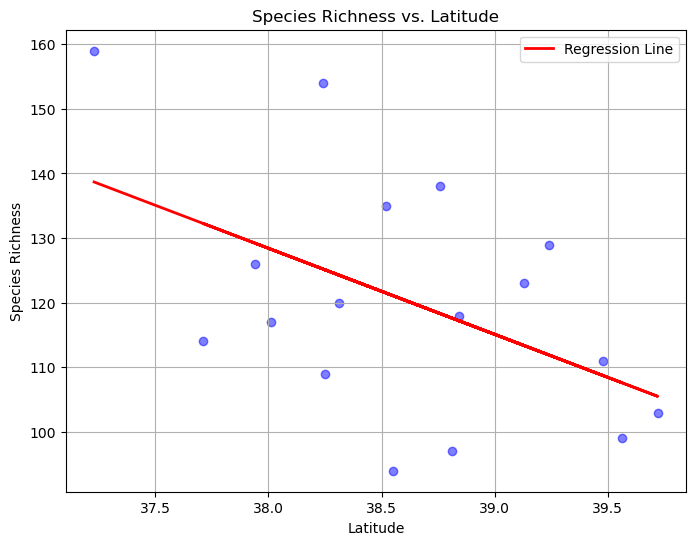

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(latitude, species_richness, color='blue', alpha=0.5)

regression_line = [slope_b * x + intercept_a for x in latitude]
plt.plot(latitude, regression_line, color='red', linestyle='-', linewidth=2, label='Regression Line')

plt.title('Species Richness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Species Richness')
plt.grid(True)
plt.legend()
plt.show()


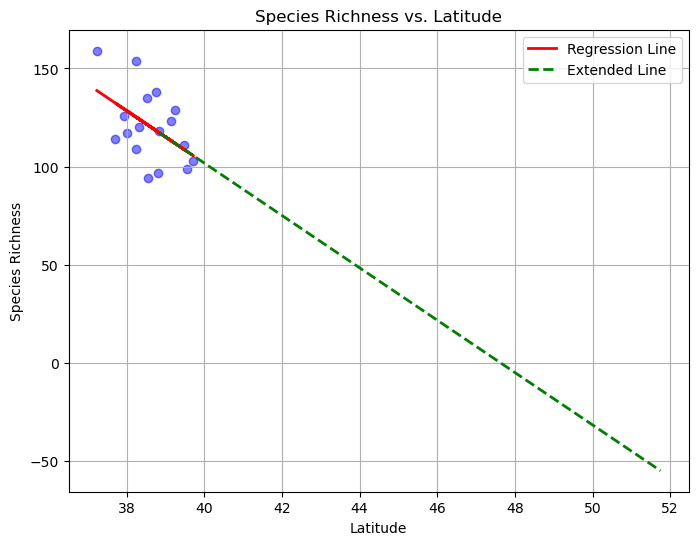

In [14]:

latitude_oxf = 51 + 45 / 60 

predicted_species_richness = slope_b * latitude_oxf + intercept_a


plt.figure(figsize=(8, 6))
plt.scatter(latitude, species_richness, color='blue', alpha=0.5)

regression_line = [slope_b * x + intercept_a for x in latitude]
plt.plot(latitude, regression_line, color='red', linestyle='-', linewidth=2, label='Regression Line')

plt.plot([latitude[-1], latitude_oxf], [regression_line[-1], predicted_species_richness],
         color='green', linestyle='--', linewidth=2, label='Extended Line')

plt.title('Species Richness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Species Richness')
plt.grid(True)
plt.legend()
plt.show()



### Q5b
#### Point estimation

### Q5c

#### The answer is very unreasonable because there cannot be a negative number of bird species in Oxford

# Q6

SciPy has several approaches that can be used to fit models (linear and otherwise) to data. We’ll spend the
rest of the lab using these helpful tools.

## Q6a

First, make a scatter plot of your bivariate data.

## Q6b

Fit your bivariate data with a linear model using a SciPy function. Calculate the residuals and plot
both (1) a scatter plot of your bivariate data that now includes the fit line and (2) a scatterplot of
residuals. Is there any pattern to your residuals? What does this mean?

## Q6c

Use the same, or different, SciPy function to calculate the the p-value for a hypothesis test whose null
hypothesis is that the slope of the regression line is significantly different from zero. Also calculate
95% confidence intervals for the estimated slope and intercept, as well as the R2 value of the
regression. Using your statistical expertise gained over this term, interpret each of the above values.

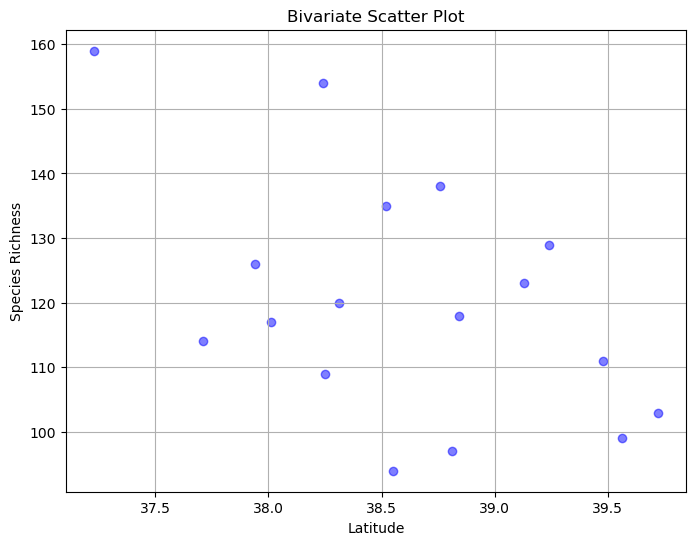

In [15]:
#Q6a

plt.figure(figsize=(8, 6))
plt.scatter(latitude, species_richness, color='blue', alpha=0.5)
plt.title('Bivariate Scatter Plot')
plt.xlabel('Latitude')
plt.ylabel('Species Richness')
plt.grid(True)
plt.show()

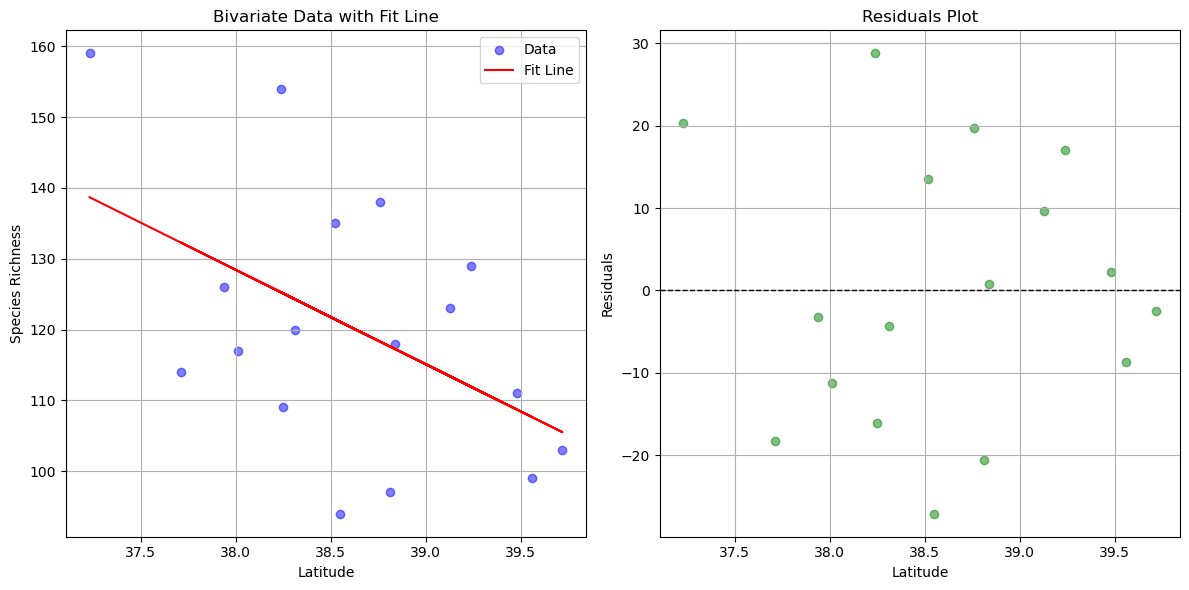

In [16]:
#Q6b

slope, intercept, r_value, p_value, std_err = sc.stats.linregress(latitude, species_richness)

predicted_values = slope * np.array(latitude) + intercept

residuals = np.array(species_richness) - predicted_values


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(latitude, species_richness, color='blue', alpha=0.5, label='Data')
plt.plot(latitude, predicted_values, color='red', label='Fit Line')
plt.title('Bivariate Data with Fit Line')
plt.xlabel('Latitude')
plt.ylabel('Species Richness')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(latitude, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals Plot')
plt.xlabel('Latitude')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()


The residuals are clustered similarly to the data points.

In [17]:
#Q6c
print("P-value for hypothesis test (slope != 0):", p_value)

conf_interval_slope = (slope - 1.96 * std_err, slope + 1.96 * std_err)
conf_interval_intercept = (intercept - 1.96 * std_err, intercept + 1.96 * std_err)
print("95% Confidence Interval for Slope:", conf_interval_slope)
print("95% Confidence Interval for Intercept:", conf_interval_intercept)

r_squared = r_value ** 2
print("R-squared value of the regression:", r_squared)

alpha = 0.05

if p_value < alpha:
    print("The slope of the regression line is significantly different from zero (p < 0.05)")
else:
    print("The slope of the regression line is not significantly different from zero (p >= 0.05)")


P-value for hypothesis test (slope != 0): 0.04455976985865183
95% Confidence Interval for Slope: (-25.238045316405717, -1.4109454465090554)
95% Confidence Interval for Intercept: (622.8432923503742, 646.670392220271)
R-squared value of the regression: 0.24263154277175344
The slope of the regression line is significantly different from zero (p < 0.05)


The result that the slope is significantly different from zero indicates that the model fits the data well, but from the negative Oxford birds, it may be that we cannot extrapolate the data too far beyond the sampled range